# SD202 TP3 - Views, Updates and Database Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a marketplace


For the first 2 parts we will use the _wine_ database and the Tables created in TP2.

A reminder of the wine database schema:

In [2]:
import sqlite3

In [3]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [4]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
T1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: MILL(NUM)
  3: DEGRE(NUM)
T1_2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
T2:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
T2_2:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
T3:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
T3_2:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
T4_2:
  0: LIEU(TEXT)
  1: REGION(TEXT)


Again, we recommend inline %sql as an alternative to the sqlite3 package

In [5]:
%load_ext sql
%sql sqlite:///wine.db

Recreate the Tables in 3NF/BCNF from Master2 as you did in the TP2

In [6]:
%sql DROP TABLE IF EXISTS T1;

# Create dummy table
%sql CREATE TABLE T1 AS \
SELECT DISTINCT NV,CRU, MILL,DEGRE \
FROM MASTER1;


 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [7]:
%sql DROP TABLE IF EXISTS T2;

# Write corresponding code here

%sql CREATE TABLE T2 AS \
SELECT DISTINCT NP,NOM,PRENOM, REGION \
FROM MASTER1;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [8]:
%sql DROP TABLE IF EXISTS T3;

# Write corresponding code here

%sql CREATE TABLE T3 AS \
SELECT DISTINCT NV,NP,QTE \
FROM MASTER1;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [9]:
%sql DROP TABLE IF EXISTS T1_2;
%sql CREATE TABLE T1_2 AS \
SELECT DISTINCT NV,CRU, DEGRE, MILL \
FROM MASTER2 ;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [10]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


[(2, 'Artaud', 'Antonin', 'moyen'),
 (3, 'Aron', 'Raymond', 'gros'),
 (4, 'Apollinaire', 'Guillaume', 'moyen'),
 (6, 'Arrabal', 'Fernando', 'gros'),
 (7, 'Anouilh', 'Jean', 'moyen'),
 (8, 'Aragon', 'Louis', 'gros'),
 (10, 'Andersen', 'Yann', 'gros'),
 (12, 'Bataille', 'Georges', 'moyen'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (14, 'Bory', 'Jean Louis', 'gros'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (19, 'Ciceron', None, 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (22, 'Cocteau', 'Jean', 'gros'),
 (24, 'Courrier', 'Paul Louis', 'moyen'),
 (26, 'Diderot', 'Denis', 'moyen'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (28, 'Dostoievsky', 'Fiodor', 'gros'),
 (31, 'Dante', None, 'gros'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (33, 'Flaubert', 'Gustave', 'moyen'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (48, 'Hardy', 'Thomas', 'moyen'),
 (50, 'Lautreamont', None, 'moyen'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (55, 'Michelet', 'Jules', 'gros'),
 (57, 'Marx', 'Karl', 'gros'),
 (58, 'Marivaux', 'Pierre Carlet de Chamblain de', 'gros'),
 (60, 'Ovide', None, 'gros'),
 (62, 'Proust', 'Marcel', 'moyen'),
 (64, 'Platon', None, 'gros'),
 (66, 'Perec', 'Georges', 'gros'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (75, 'Ronsard', 'Pierre', 'moyen'),
 (76, 'Racine', 'Jean', 'gros'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (94, 'Zola', 'Emile', 'moyen'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

In [11]:
%sql DROP TABLE IF EXISTS T2_2;
%sql CREATE TABLE T2_2 AS \
SELECT DISTINCT NB,NOM, PRENOM, TYPE \
FROM MASTER2;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [12]:
%sql DROP TABLE IF EXISTS T3_2;

%sql CREATE TABLE T3_2 AS \
SELECT DISTINCT NV, NB, DATES, LIEU, QTE \
FROM MASTER2 ;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [13]:
%sql DROP TABLE IF EXISTS T4_2;

%sql CREATE TABLE T4_2 AS \
SELECT DISTINCT LIEU,REGION \
FROM MASTER2 ;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```sql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command is:

```sql
DROP VIEW IF EXISTS view_name;
```


__Note:__ Use it with caution (only drop something if you are sure)

__1.1__ Create a view 'bons_buveurs' with the clients (buveurs) of type 'gros' or 'moyen'.

In [14]:
%sql DROP VIEW IF EXISTS bons_buveurs;
%sql CREATE VIEW bons_buveurs AS SELECT T2_2.NB, T2_2.NOM, T2_2.PRENOM, T2_2.TYPE FROM T2_2 WHERE TYPE IN {"moyen", "gros"}

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

__1.2__ Create the view 'buveurs_asec' with clients (buveurs) who have not bought any wine.

In [15]:
%sql DROP VIEW IF EXISTS buveurs_asec;
%sql CREATE VIEW buveurs_asec AS SELECT T2_2.NB, T2_2.NOM, T2_2.PRENOM, T2_2.TYPE FROM T2_2 JOIN T3_2 ON T3_2.NB = T2_2.NB GROUP BY T2_2.NB HAVING SUM(T3_2.QTE) IS NULL ORDER BY T2_2.NB

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [16]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


[(11, 'Breton', 'Andre', 'petit'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (21, 'Corbiere', 'Tristan', 'petit'),
 (23, 'Corneille', 'Pierre', 'petit'),
 (25, 'Char', 'Rene', 'petit'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (29, 'Fournier', 'Alain', 'petit'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (34, 'Mauriac', 'Francois', 'petit'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (36, 'Maurois', 'Andre', 'petit'),
 (37, 'Freud', 'Sigmund', 'petit'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (47, 'Gary', 'Romain', 'petit'),
 (51, 'Lafargue', 'Paul', 'petit'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (54, 'Aurele', 'Marc', 'petit'),
 (55, 'Michelet', 'Jules', 'gros'),
 (56, 'Nerval', 'Gerard de', 'petit'),
 (57, 'Marx', 'Karl', 'gros'),
 (59, 'Nietzsche', 'Friedrich', 'petit'),
 (63, 'Maupassant', 'Guy de', 'petit'),
 (64, 'Platon', None, 'gros'),
 (65, 'Pascal', 'Blaise', 'petit'),
 (66, 'Perec', 'Georges', 'gros'),
 (67, 'Nin', 'Anais', 'petit'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (69, 'Queneau', 'Raymond', 'petit'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (71, 'Radiguet', 'Raymond', 'petit'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (74, 'Rimbaud', 'Arthur', 'petit'),
 (76, 'Racine', 'Jean', 'gros'),
 (77, 'Rousseau', 'Jean-Jacques', 'petit'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (85, 'Segalen', 'Victor', 'petit'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (88, 'Shakespeare', 'William', 'petit'),
 (89, 'Stendhal', None, 'petit'),
 (90, 'Vian', 'Boris', 'petit'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

__1.3__ Create the view 'buveurs_achats' complementary to the previous one.

In [17]:
%sql DROP VIEW IF EXISTS buveurs_achats;
%sql CREATE VIEW buveurs_achats AS SELECT T2_2.NB, T2_2.NOM, T2_2.PRENOM, T2_2.TYPE FROM T2_2\
EXCEPT\
SELECT T2_2.NB, T2_2.NOM, T2_2.PRENOM, T2_2.TYPE FROM T2_2 JOIN T3_2 ON T3_2.NB = T2_2.NB GROUP BY T2_2.NB HAVING SUM(T3_2.QTE) IS NULL

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [18]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


[(None, None, None, None),
 (1, 'Aristote', None, 'petit'),
 (2, 'Artaud', 'Antonin', 'moyen'),
 (3, 'Aron', 'Raymond', 'gros'),
 (4, 'Apollinaire', 'Guillaume', 'moyen'),
 (5, 'Audiberti', 'Jacques', 'petit'),
 (6, 'Arrabal', 'Fernando', 'gros'),
 (7, 'Anouilh', 'Jean', 'moyen'),
 (8, 'Aragon', 'Louis', 'gros'),
 (9, 'Ajar', 'Emile', 'petit'),
 (10, 'Andersen', 'Yann', 'gros'),
 (12, 'Bataille', 'Georges', 'moyen'),
 (14, 'Bory', 'Jean Louis', 'gros'),
 (15, 'Baudelaire', 'Charles', 'petit'),
 (17, 'Camus', 'Albert', 'petit'),
 (19, 'Ciceron', None, 'gros'),
 (22, 'Cocteau', 'Jean', 'gros'),
 (24, 'Courrier', 'Paul Louis', 'moyen'),
 (26, 'Diderot', 'Denis', 'moyen'),
 (28, 'Dostoievsky', 'Fiodor', 'gros'),
 (30, 'La Fontaine', 'Jean de', 'petit'),
 (31, 'Dante', None, 'gros'),
 (33, 'Flaubert', 'Gustave', 'moyen'),
 (38, 'Montaigne', 'Michel de', 'petit'),
 (40, 'Moliere', None, 'petit'),
 (41, 'Gauthier', 'Theophile', 'petit'),
 (44, 'Gide', 'Andre', 'petit'),
 (45, 'Giono', 'Jean', 'petit'),
 (48, 'Hardy', 'Thomas', 'moyen'),
 (49, 'Kafka', 'Franz', 'petit'),
 (50, 'Lautreamont', None, 'moyen'),
 (52, 'Carroll', 'Lewis', 'petit'),
 (58, 'Marivaux', 'Pierre Carlet de Chamblain de', 'gros'),
 (60, 'Ovide', None, 'gros'),
 (61, 'Mallarme', 'Stephane', 'petit'),
 (62, 'Proust', 'Marcel', 'moyen'),
 (75, 'Ronsard', 'Pierre', 'moyen'),
 (80, 'Sand', 'Georges', 'petit'),
 (82, 'Roussel', 'Rene', 'petit'),
 (92, 'Verne', 'Jules', 'petit'),
 (94, 'Zola', 'Emile', 'moyen'),
 (96, 'Wilde', 'Oscar', 'petit'),
 (97, 'Vigny', 'Alfred de', 'petit'),
 (100, 'Woolf', 'Virginia', 'petit')]

__1.4__ Create the view 'q83pl' (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [19]:
%sql DROP VIEW IF EXISTS q83pl;
%sql CREATE VIEW q83pl AS SELECT DISTINCT T3_2.LIEU, T1_2.CRU, SUM(T3_2.QTE) AS QTE_BUE FROM T1_2 JOIN T3_2 ON T1_2.NV = T3_2.NV WHERE T3_2.DATES LIKE '1983%' GROUP BY T1_2.CRU, T3_2.LIEU ORDER BY LIEU

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [20]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


[('CAEN', 'Seyssel', 3),
 ('LILLE', 'Pommard', 5),
 ('LYON', 'Beaujolais Villages', 10),
 ('LYON', 'Julienas', 2),
 ('PARIS', 'Beaujolais Primeur', 4),
 ('PARIS', 'Coteaux du Tricastin', 1),
 ('PARIS', 'Pouilly Vinzelles', 3),
 ('RENNES', 'Mercurey', 1),
 ('ROCQUENCOURT', 'Beaujolais Villages', 260),
 ('ROCQUENCOURT', 'Saint Amour', 80)]

__1.5__ Can we define the same view with ascending order over the attribute QTE? Provide an explanation for your answer.

In [21]:
%sql DROP VIEW IF EXISTS q83pl_bis;
%sql CREATE VIEW q83pl_bis AS SELECT DISTINCT T3_2.LIEU, T1_2.CRU, SUM(T3_2.QTE) AS QTE_BUE FROM T1_2 JOIN T3_2 ON T1_2.NV = T3_2.NV WHERE T3_2.DATES LIKE '1983%' GROUP BY T1_2.CRU, T3_2.LIEU ORDER BY QTE_BUE

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [22]:
%sql SELECT * FROM q83pl_bis;

 * sqlite:///wine.db
Done.


[('PARIS', 'Coteaux du Tricastin', 1),
 ('RENNES', 'Mercurey', 1),
 ('LYON', 'Julienas', 2),
 ('PARIS', 'Pouilly Vinzelles', 3),
 ('CAEN', 'Seyssel', 3),
 ('PARIS', 'Beaujolais Primeur', 4),
 ('LILLE', 'Pommard', 5),
 ('LYON', 'Beaujolais Villages', 10),
 ('ROCQUENCOURT', 'Saint Amour', 80),
 ('ROCQUENCOURT', 'Beaujolais Villages', 260)]

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the Update statement is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the Insert statement is:

```sql
INSERT INTO TABLE_NAME [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```


Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you may not execute a DELETE, INSERT or UPDATE statement on a view.

__2.1__ Create a table 'RBB' with the same schema as 'bons_buveurs' which contains the tuples selected from 'bons_buveurs'

In [24]:
%sql DROP TABLE IF EXISTS RBB

%sql CREATE TABLE RBB AS \
SELECT * FROM bons_buveurs \
ORDER BY NB ;

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [25]:
# Test
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


[(2, 'Artaud', 'Antonin', 'moyen'),
 (3, 'Aron', 'Raymond', 'gros'),
 (4, 'Apollinaire', 'Guillaume', 'moyen'),
 (6, 'Arrabal', 'Fernando', 'gros'),
 (7, 'Anouilh', 'Jean', 'moyen'),
 (8, 'Aragon', 'Louis', 'gros'),
 (10, 'Andersen', 'Yann', 'gros'),
 (12, 'Bataille', 'Georges', 'moyen'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (14, 'Bory', 'Jean Louis', 'gros'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (19, 'Ciceron', None, 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (22, 'Cocteau', 'Jean', 'gros'),
 (24, 'Courrier', 'Paul Louis', 'moyen'),
 (26, 'Diderot', 'Denis', 'moyen'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (28, 'Dostoievsky', 'Fiodor', 'gros'),
 (31, 'Dante', None, 'gros'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (33, 'Flaubert', 'Gustave', 'moyen'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (48, 'Hardy', 'Thomas', 'moyen'),
 (50, 'Lautreamont', None, 'moyen'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (55, 'Michelet', 'Jules', 'gros'),
 (57, 'Marx', 'Karl', 'gros'),
 (58, 'Marivaux', 'Pierre Carlet de Chamblain de', 'gros'),
 (60, 'Ovide', None, 'gros'),
 (62, 'Proust', 'Marcel', 'moyen'),
 (64, 'Platon', None, 'gros'),
 (66, 'Perec', 'Georges', 'gros'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (75, 'Ronsard', 'Pierre', 'moyen'),
 (76, 'Racine', 'Jean', 'gros'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (94, 'Zola', 'Emile', 'moyen'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

__2.2__ Update the table you used to create 'bons_buveurs': Change the 'type' to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may be different from the one in your table)

In [29]:
%sql SELECT T2_2.NB, T2_2.NOM, T2_2.PRENOM, T2_2.TYPE, SUM(T3_2.QTE) AS TOTAL FROM T2_2 INNER JOIN T3_2 ON T2_2.NB = T3_2.NB \
WHERE T2_2.TYPE IN {'petit', 'moyen'} GROUP BY T2_2.NB HAVING TOTAL > 99 ;

 * sqlite:///wine.db
Done.


[(2, 'Artaud', 'Antonin', 'moyen', 583),
 (5, 'Audiberti', 'Jacques', 'petit', 113),
 (9, 'Ajar', 'Emile', 'petit', 140),
 (44, 'Gide', 'Andre', 'petit', 171)]

Update instances

In [33]:
%sql UPDATE T2_2 SET TYPE = 'gros'\
WHERE T2_2.NB IN (SELECT NB FROM (SELECT T2_2.NB, T2_2.NOM, T2_2.PRENOM, T2_2.TYPE, SUM(T3_2.QTE) AS TOTAL FROM T2_2 INNER JOIN T3_2 ON T2_2.NB = T3_2.NB \
WHERE T2_2.TYPE IN {'petit', 'moyen'} GROUP BY T2_2.NB HAVING TOTAL > 99 ));

 * sqlite:///wine.db
4 rows affected.


[]

__2.3__ Compare the content of _table_ 'RBB' and the _view_ 'bons_buveurs' after the update. What differences do you see? Explain

In [34]:
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


[(2, 'Artaud', 'Antonin', 'moyen'),
 (3, 'Aron', 'Raymond', 'gros'),
 (4, 'Apollinaire', 'Guillaume', 'moyen'),
 (6, 'Arrabal', 'Fernando', 'gros'),
 (7, 'Anouilh', 'Jean', 'moyen'),
 (8, 'Aragon', 'Louis', 'gros'),
 (10, 'Andersen', 'Yann', 'gros'),
 (12, 'Bataille', 'Georges', 'moyen'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (14, 'Bory', 'Jean Louis', 'gros'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (19, 'Ciceron', None, 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (22, 'Cocteau', 'Jean', 'gros'),
 (24, 'Courrier', 'Paul Louis', 'moyen'),
 (26, 'Diderot', 'Denis', 'moyen'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (28, 'Dostoievsky', 'Fiodor', 'gros'),
 (31, 'Dante', None, 'gros'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (33, 'Flaubert', 'Gustave', 'moyen'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (48, 'Hardy', 'Thomas', 'moyen'),
 (50, 'Lautreamont', None, 'moyen'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (55, 'Michelet', 'Jules', 'gros'),
 (57, 'Marx', 'Karl', 'gros'),
 (58, 'Marivaux', 'Pierre Carlet de Chamblain de', 'gros'),
 (60, 'Ovide', None, 'gros'),
 (62, 'Proust', 'Marcel', 'moyen'),
 (64, 'Platon', None, 'gros'),
 (66, 'Perec', 'Georges', 'gros'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (75, 'Ronsard', 'Pierre', 'moyen'),
 (76, 'Racine', 'Jean', 'gros'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (94, 'Zola', 'Emile', 'moyen'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

In [37]:
%sql SELECT * FROM bons_buveurs order by bons_buveurs.NB

 * sqlite:///wine.db
Done.


[(2, 'Artaud', 'Antonin', 'gros'),
 (3, 'Aron', 'Raymond', 'gros'),
 (4, 'Apollinaire', 'Guillaume', 'moyen'),
 (5, 'Audiberti', 'Jacques', 'gros'),
 (6, 'Arrabal', 'Fernando', 'gros'),
 (7, 'Anouilh', 'Jean', 'moyen'),
 (8, 'Aragon', 'Louis', 'gros'),
 (9, 'Ajar', 'Emile', 'gros'),
 (10, 'Andersen', 'Yann', 'gros'),
 (12, 'Bataille', 'Georges', 'moyen'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (14, 'Bory', 'Jean Louis', 'gros'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (19, 'Ciceron', None, 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (22, 'Cocteau', 'Jean', 'gros'),
 (24, 'Courrier', 'Paul Louis', 'moyen'),
 (26, 'Diderot', 'Denis', 'moyen'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (28, 'Dostoievsky', 'Fiodor', 'gros'),
 (31, 'Dante', None, 'gros'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (33, 'Flaubert', 'Gustave', 'moyen'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (44, 'Gide', 'Andre', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (48, 'Hardy', 'Thomas', 'moyen'),
 (50, 'Lautreamont', None, 'moyen'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (55, 'Michelet', 'Jules', 'gros'),
 (57, 'Marx', 'Karl', 'gros'),
 (58, 'Marivaux', 'Pierre Carlet de Chamblain de', 'gros'),
 (60, 'Ovide', None, 'gros'),
 (62, 'Proust', 'Marcel', 'moyen'),
 (64, 'Platon', None, 'gros'),
 (66, 'Perec', 'Georges', 'gros'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (75, 'Ronsard', 'Pierre', 'moyen'),
 (76, 'Racine', 'Jean', 'gros'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (94, 'Zola', 'Emile', 'moyen'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

In Bon buveurs they are 3 new clients (the 5 9 and 44) that are the newly "gros" clients. Plus, the 2nd client in bons_biveur is "gros" while it is "moyen" in RBB. RBB was created from the view of bons_bveurs before we updates this table. Hence the differences.

__2.4__ Create a table 'RBA' with the same schema as 'buveurs_asec' which contains the tuples selected from 'buveurs_asec'

In [42]:
%sql DROP TABLE IF EXISTS RBA

%sql CREATE TABLE RBA AS SELECT * FROM buveurs_asec ORDER BY buveurs_asec.NB 

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [43]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


[(11, 'Breton', 'Andre', 'petit'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (21, 'Corbiere', 'Tristan', 'petit'),
 (23, 'Corneille', 'Pierre', 'petit'),
 (25, 'Char', 'Rene', 'petit'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (29, 'Fournier', 'Alain', 'petit'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (34, 'Mauriac', 'Francois', 'petit'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (36, 'Maurois', 'Andre', 'petit'),
 (37, 'Freud', 'Sigmund', 'petit'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (47, 'Gary', 'Romain', 'petit'),
 (51, 'Lafargue', 'Paul', 'petit'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (54, 'Aurele', 'Marc', 'petit'),
 (55, 'Michelet', 'Jules', 'gros'),
 (56, 'Nerval', 'Gerard de', 'petit'),
 (57, 'Marx', 'Karl', 'gros'),
 (59, 'Nietzsche', 'Friedrich', 'petit'),
 (63, 'Maupassant', 'Guy de', 'petit'),
 (64, 'Platon', None, 'gros'),
 (65, 'Pascal', 'Blaise', 'petit'),
 (66, 'Perec', 'Georges', 'gros'),
 (67, 'Nin', 'Anais', 'petit'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (69, 'Queneau', 'Raymond', 'petit'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (71, 'Radiguet', 'Raymond', 'petit'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (74, 'Rimbaud', 'Arthur', 'petit'),
 (76, 'Racine', 'Jean', 'gros'),
 (77, 'Rousseau', 'Jean-Jacques', 'petit'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (85, 'Segalen', 'Victor', 'petit'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (88, 'Shakespeare', 'William', 'petit'),
 (89, 'Stendhal', None, 'petit'),
 (90, 'Vian', 'Boris', 'petit'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

__2.5__ Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to 'RBA'

In [49]:
%sql INSERT INTO RBA VALUES (101, 'Ducottet', 'Rémi', 'moyen');

 * sqlite:///wine.db
1 rows affected.


[]

In [50]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


[(11, 'Breton', 'Andre', 'petit'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (21, 'Corbiere', 'Tristan', 'petit'),
 (23, 'Corneille', 'Pierre', 'petit'),
 (25, 'Char', 'Rene', 'petit'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (29, 'Fournier', 'Alain', 'petit'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (34, 'Mauriac', 'Francois', 'petit'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (36, 'Maurois', 'Andre', 'petit'),
 (37, 'Freud', 'Sigmund', 'petit'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (47, 'Gary', 'Romain', 'petit'),
 (51, 'Lafargue', 'Paul', 'petit'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (54, 'Aurele', 'Marc', 'petit'),
 (55, 'Michelet', 'Jules', 'gros'),
 (56, 'Nerval', 'Gerard de', 'petit'),
 (57, 'Marx', 'Karl', 'gros'),
 (59, 'Nietzsche', 'Friedrich', 'petit'),
 (63, 'Maupassant', 'Guy de', 'petit'),
 (64, 'Platon', None, 'gros'),
 (65, 'Pascal', 'Blaise', 'petit'),
 (66, 'Perec', 'Georges', 'gros'),
 (67, 'Nin', 'Anais', 'petit'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (69, 'Queneau', 'Raymond', 'petit'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (71, 'Radiguet', 'Raymond', 'petit'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (74, 'Rimbaud', 'Arthur', 'petit'),
 (76, 'Racine', 'Jean', 'gros'),
 (77, 'Rousseau', 'Jean-Jacques', 'petit'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (85, 'Segalen', 'Victor', 'petit'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (88, 'Shakespeare', 'William', 'petit'),
 (89, 'Stendhal', None, 'petit'),
 (90, 'Vian', 'Boris', 'petit'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros'),
 (101, 'Ducottet', 'Rémi', 'moyen'),
 (101, 'Ducottet', 'Rémi', 'moyen')]

__2.6__ Compare the content of _table_ 'RBA' and the _view_ 'buveurs_asec'. What differences do you see? Explain

In [47]:
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


[(11, 'Breton', 'Andre', 'petit'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (21, 'Corbiere', 'Tristan', 'petit'),
 (23, 'Corneille', 'Pierre', 'petit'),
 (25, 'Char', 'Rene', 'petit'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (29, 'Fournier', 'Alain', 'petit'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (34, 'Mauriac', 'Francois', 'petit'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (36, 'Maurois', 'Andre', 'petit'),
 (37, 'Freud', 'Sigmund', 'petit'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (47, 'Gary', 'Romain', 'petit'),
 (51, 'Lafargue', 'Paul', 'petit'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (54, 'Aurele', 'Marc', 'petit'),
 (55, 'Michelet', 'Jules', 'gros'),
 (56, 'Nerval', 'Gerard de', 'petit'),
 (57, 'Marx', 'Karl', 'gros'),
 (59, 'Nietzsche', 'Friedrich', 'petit'),
 (63, 'Maupassant', 'Guy de', 'petit'),
 (64, 'Platon', None, 'gros'),
 (65, 'Pascal', 'Blaise', 'petit'),
 (66, 'Perec', 'Georges', 'gros'),
 (67, 'Nin', 'Anais', 'petit'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (69, 'Queneau', 'Raymond', 'petit'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (71, 'Radiguet', 'Raymond', 'petit'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (74, 'Rimbaud', 'Arthur', 'petit'),
 (76, 'Racine', 'Jean', 'gros'),
 (77, 'Rousseau', 'Jean-Jacques', 'petit'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (85, 'Segalen', 'Victor', 'petit'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (88, 'Shakespeare', 'William', 'petit'),
 (89, 'Stendhal', None, 'petit'),
 (90, 'Vian', 'Boris', 'petit'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros'),
 (101, 'Ducottet', 'Rémi', 'moyen')]

In [48]:
%sql SELECT * FROM buveurs_asec

 * sqlite:///wine.db
Done.


[(11, 'Breton', 'Andre', 'petit'),
 (13, 'Barthes', 'Roland', 'moyen'),
 (16, 'Balzac', 'Honore de', 'moyen'),
 (18, 'Celine', 'Louis Ferdinand', 'gros'),
 (20, 'Chateaubriand', 'Francois-Rene de', 'moyen'),
 (21, 'Corbiere', 'Tristan', 'petit'),
 (23, 'Corneille', 'Pierre', 'petit'),
 (25, 'Char', 'Rene', 'petit'),
 (27, 'Dumas', 'Alexandre', 'gros'),
 (29, 'Fournier', 'Alain', 'petit'),
 (32, 'Eluard', 'Paul', 'moyen'),
 (34, 'Mauriac', 'Francois', 'petit'),
 (35, 'Fromentin', 'Eugene', 'gros'),
 (36, 'Maurois', 'Andre', 'petit'),
 (37, 'Freud', 'Sigmund', 'petit'),
 (39, 'Montesquieu', None, 'gros'),
 (42, 'Goethe', 'Johann Wolfgang von', 'moyen'),
 (43, 'Musset', 'Alfred de', 'gros'),
 (46, 'Hugo', 'Victor', 'moyen'),
 (47, 'Gary', 'Romain', 'petit'),
 (51, 'Lafargue', 'Paul', 'petit'),
 (53, 'Lamartine', 'Alphonse de', 'gros'),
 (54, 'Aurele', 'Marc', 'petit'),
 (55, 'Michelet', 'Jules', 'gros'),
 (56, 'Nerval', 'Gerard de', 'petit'),
 (57, 'Marx', 'Karl', 'gros'),
 (59, 'Nietzsche', 'Friedrich', 'petit'),
 (63, 'Maupassant', 'Guy de', 'petit'),
 (64, 'Platon', None, 'gros'),
 (65, 'Pascal', 'Blaise', 'petit'),
 (66, 'Perec', 'Georges', 'gros'),
 (67, 'Nin', 'Anais', 'petit'),
 (68, 'Prevert', 'Jacques', 'gros'),
 (69, 'Queneau', 'Raymond', 'petit'),
 (70, 'Paulhan', 'Jean', 'gros'),
 (71, 'Radiguet', 'Raymond', 'petit'),
 (72, 'Rabelais', 'Francois', 'gros'),
 (73, 'Poe', 'Allan Edgard', 'moyen'),
 (74, 'Rimbaud', 'Arthur', 'petit'),
 (76, 'Racine', 'Jean', 'gros'),
 (77, 'Rousseau', 'Jean-Jacques', 'petit'),
 (78, 'Sandier', 'Jules', 'moyen'),
 (79, 'Sade', 'Donatien Alphonse Fran¿¿s de', 'gros'),
 (81, 'Sartre', 'Jean-Paul', 'gros'),
 (83, 'Sophocle', None, 'gros'),
 (84, 'Sue', 'Eugene', 'moyen'),
 (85, 'Segalen', 'Victor', 'petit'),
 (86, 'Saint Exupery', 'Antoine de', 'gros'),
 (87, 'Segur', 'Comtesse de', 'gros'),
 (88, 'Shakespeare', 'William', 'petit'),
 (89, 'Stendhal', None, 'petit'),
 (90, 'Vian', 'Boris', 'petit'),
 (91, 'Verlaine', 'Paul', 'gros'),
 (93, 'Virgile', None, 'gros'),
 (95, 'Zorn', 'Fritz', 'moyen'),
 (98, 'Maturin', 'Robert', 'gros'),
 (99, 'Cesar', 'Jules', 'gros')]

My name wasn't added to the view buveurs_asec as it only is a virtual temporary table at an instant t of the initial table, in which we added afterward my name.

___
# PART III: Design the database schema for a marketplace

We consider the following scenario:

You are a developer for a game. In the game, there are several kinds of objects that the players can collect (e.g. magical flowers, gems, etc.). Players can also sell or buy objects from a marketplace that works in the following way: players declare some of the objects in their possession as “buyable”
with a price for each buyable object and then any player can buy items marked as buyable. When a player buys an item, the possession of the item is transferred to the buyer while the money corresponding to the item is transferred from the buyer to the seller. Note that, as long as the item is not sold, it still belongs to the player. Your goal is to
create a database for this marketplace.

The database schema you will develop needs to support players, the money each player has, the various types
of objects present in the game and how many objects of each kind each player has.Your database need to be able
to support the following kind of operations:

* Create a new type of object or add new players,
* Change the name of a type of objects or the name of a player,
* Attribute an object of a given type to a player,
* Increase or decrease the amount of money a player has,
* Retrieve the list of all the items that a player has,
* Compute the current balance of a player,
* Allow a player to mark one of their item as buyable with a given price,
* Allow a player to buy the cheapest item of a given type from the marketplace.

Ideally your schema should enforce the following constraints:

* All the objects that the players have correspond to some known type,
* Each object is possessed by exactly one player,
* Any single object cannot be marked twice as buyable, nor it can have two different prices (but two different objects of the same kind can have different prices),
* Any player has a positive amount of money.

__3.1__ Draw an entity-relationship model for the scenario.

_to answer, you can for example join a figure with the notebook or write the information related to the entity and relationship sets_

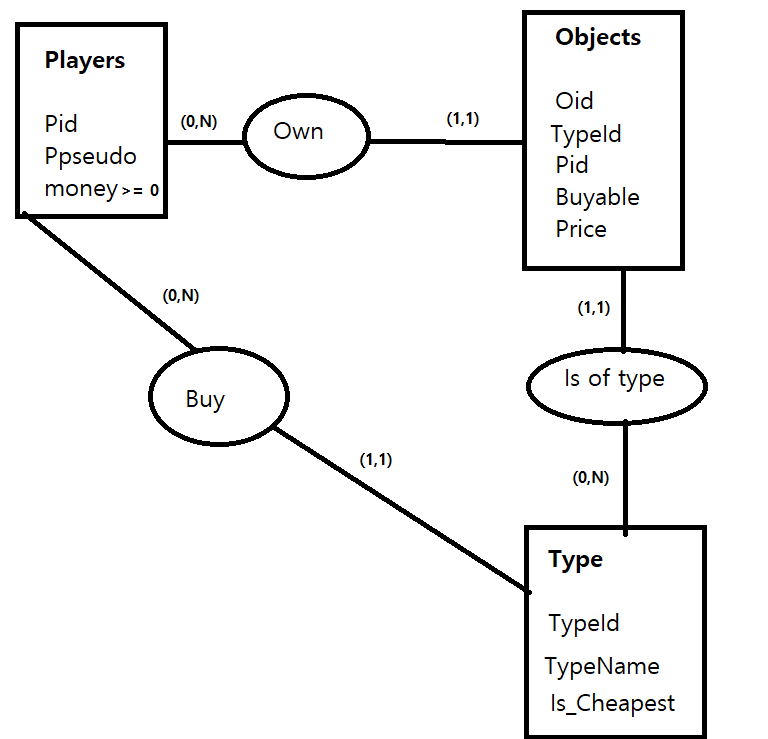

To ensure that the amount of Money of each player is positive we must writte : 
CONSTRAINT CHK_PositiveEntity CHECK (Money > 0)

__3.2__ Deduce the relational scheme while precising the _primary_ and _foreign_ (if any) keys for each relation.